# Google Play Apps Project:

# Group 02


### Name of students:




Daniel Hatuka

Yair ogen

Hod Gispan


<div>
<img src="https://github.com/Yairvedaniel/project1/blob/main/PHOTO-2024-06-05-14-34-50.jpg?raw=true" width="400"/>
</div>



העבודה נעשתה בשיתוף פעולה מלא בין שלושת חברי הצוות.

<a id="top"></a>
# Table of Contents
1. [Introduction](#phaze-1)

2. [Data Cleaning and Preprocessing](#phaze-2)

3. [Paid Apps vs Free Apps](#phaze-3)

4. [Relationship between App Size and Popularity](#phaze-4)

5. [The Impact of App Name on Its Popularity](#phaze-5)

6. [Conclusion and Key Insights](#phase-6)


<a id="phaze-1"></a>
## 1.Introduction:

[back to top](#top)

### information on tha data
We'll work with a dataset, based on Google Play Store Apps

The source of the data file  [here](https://www.kaggle.com/datasets/bhavikjikadara/google-play-store-applications/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
url = 'https://raw.githubusercontent.com/Yairvedaniel/project1/main/googleplaystore_%D7%A4%D7%A8%D7%95%D7%99%D7%A7%D7%98%20%D7%A2%D7%95%D7%92%D7%9F%20%D7%95%D7%93%D7%A0%D7%99%D7%90%D7%9C.csv'
apps = pd.read_csv(url)
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
apps.shape

(10841, 14)

In [4]:
apps.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

<a id="phaze-2"></a>
## 2.Data Cleaning and Preprocessing:

[back to top](#top)


הסרת עמודה מיותרת

In [6]:
apps = apps.drop('Unnamed: 0', axis=1)
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

בדיקת כפילויות

In [7]:
apps.duplicated().sum()

483

In [8]:

apps.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price','Android Ver'], inplace=True)

In [9]:
apps.duplicated().sum()

0

In [10]:
apps.shape

(10350, 13)

In [11]:
missing_data = apps.isnull().sum()
print("Missing data before handling:")
print(missing_data)

Missing data before handling:
App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


הסרת שורות בעלות ערכים חסרים בודדים

In [12]:
apps = apps.dropna(subset=['Current Ver'])
apps = apps.dropna(subset=['Android Ver'])
apps = apps.dropna(subset=['Content Rating'])
apps = apps.dropna(subset=['Type'])

In [13]:
apps.shape

(10338, 13)

ישנו ערך קטגורי החוזר על עצמו במקרים רבים בעמודות מספריות. לאחר חשיבה בנוגע לנחיצותו בניתוח הנתונים - החלטנו להמיר אותו ב NaN

In [14]:
apps.replace('Varies with device', np.nan, inplace=True)


הסרת תווים מיוחדים מעמודות מספריות

In [15]:
cols = ['Installs','Price']
chars = ['+',",","$"]
for col in cols:   
    for char in chars:
            apps[col] = apps[col].apply(lambda c: c.replace(char, ''))


In [16]:
def size_to_mb(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1000
    return None

apps.loc[:, 'Size_MB'] = apps['Size'].apply(size_to_mb)

print(apps[['Size', 'Size_MB']].head())


   Size  Size_MB
0   19M     19.0
1   14M     14.0
2  8.7M      8.7
3   25M     25.0
4  2.8M      2.8


In [17]:
apps = apps.drop('Size', axis=1)

In [18]:
missing_data = apps.isnull().sum()
print("Missing data before handling:", "\n")
print(missing_data)

Missing data before handling: 

App                  0
Category             0
Rating            1460
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1301
Android Ver       1220
Size_MB           1524
dtype: int64


In [19]:
apps.Reviews = pd.to_numeric(apps.Reviews, errors='coerce')
apps.Price = pd.to_numeric(apps.Price, errors='coerce')
apps.Rating = pd.to_numeric(apps.Rating, errors='coerce')
apps.Installs = pd.to_numeric(apps.Installs, errors='coerce') 
apps.Size_MB = pd.to_numeric(apps.Size_MB, errors='coerce') 
apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

In [20]:
rate_apps = apps.dropna(subset=['Rating']).copy()
size_apps = apps.dropna(subset=['Size_MB']).copy()

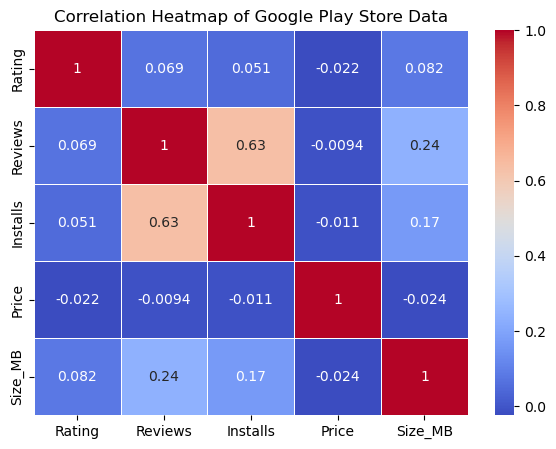

In [21]:
numeric_apps = apps.select_dtypes(include=[np.number])

correlation_matrix = numeric_apps.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Google Play Store Data')
plt.show()

כפי שניתן לראות אין קורולציות חזקות בין הנתונים.

נצלול קצת יותר לנתונים עצמם

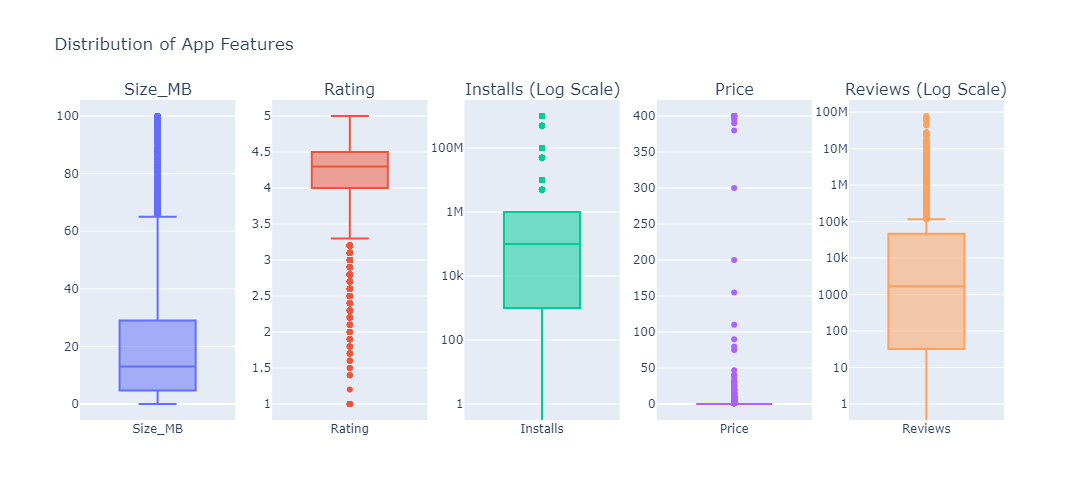

In [22]:
fig = make_subplots(rows=1, cols=5, subplot_titles=("Size_MB", "Rating", "Installs (Log Scale)", "Price", "Reviews (Log Scale)"))

fig.add_trace(go.Box(y=apps['Size_MB'], name='Size_MB'), row=1, col=1)
fig.add_trace(go.Box(y=apps['Rating'], name='Rating'), row=1, col=2)
fig.add_trace(go.Box(y=apps['Installs'], name='Installs'), row=1, col=3)
fig.update_yaxes(type="log", row=1, col=3)

fig.add_trace(go.Box(y=apps['Price'], name='Price'), row=1, col=4)
fig.add_trace(go.Box(y=apps['Reviews'], name='Reviews'), row=1, col=5)
fig.update_yaxes(type="log", row=1, col=5)
fig.update_layout(height=500, width=900, title_text="Distribution of App Features", showlegend=False)

fig.show()

In [23]:
apps_over_1M = apps[apps['Installs'] > 1000000]
print("Number of apps with over 1M installs:", apps_over_1M.shape[0])

apps_over_65MB = apps[apps['Size_MB'] >= 65]
print("Number of apps with over 65MB:", apps_over_65MB.shape[0])

apps_over_115K = apps[apps['Reviews'] >= 115000]
print("Number of apps with over 115K:", apps_over_115K.shape[0])

Number of apps with over 1M installs: 2560
Number of apps with over 65MB: 591
Number of apps with over 115K: 1873


<a id="phaze-3"></a>
## 3.Paid Apps vs Free Apps:

[back to top](#top)

בדיקת הקשרים בין אפליקציות בתשלום\חינמיות אל מול שאר הנתונים

In [24]:
free_apps = apps[apps['Price'] == 0].copy()
paid_apps = apps[apps['Price'] > 0].copy()

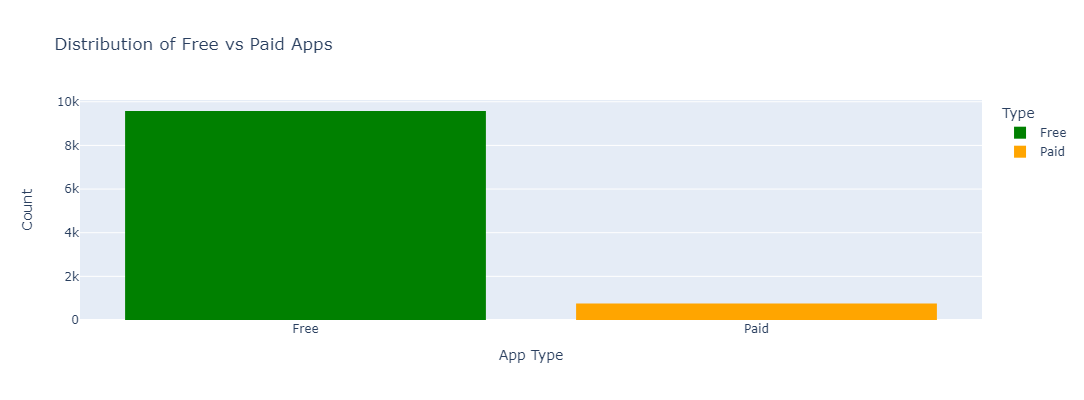

In [25]:
fig = px.histogram(apps, x='Type', color='Type', color_discrete_map={'Free': 'green', 'Paid': 'orange'}, title='Distribution of Free vs Paid Apps')
fig.update_layout(xaxis_title='App Type',yaxis_title='Count', width=800, height=400)

fig.show()

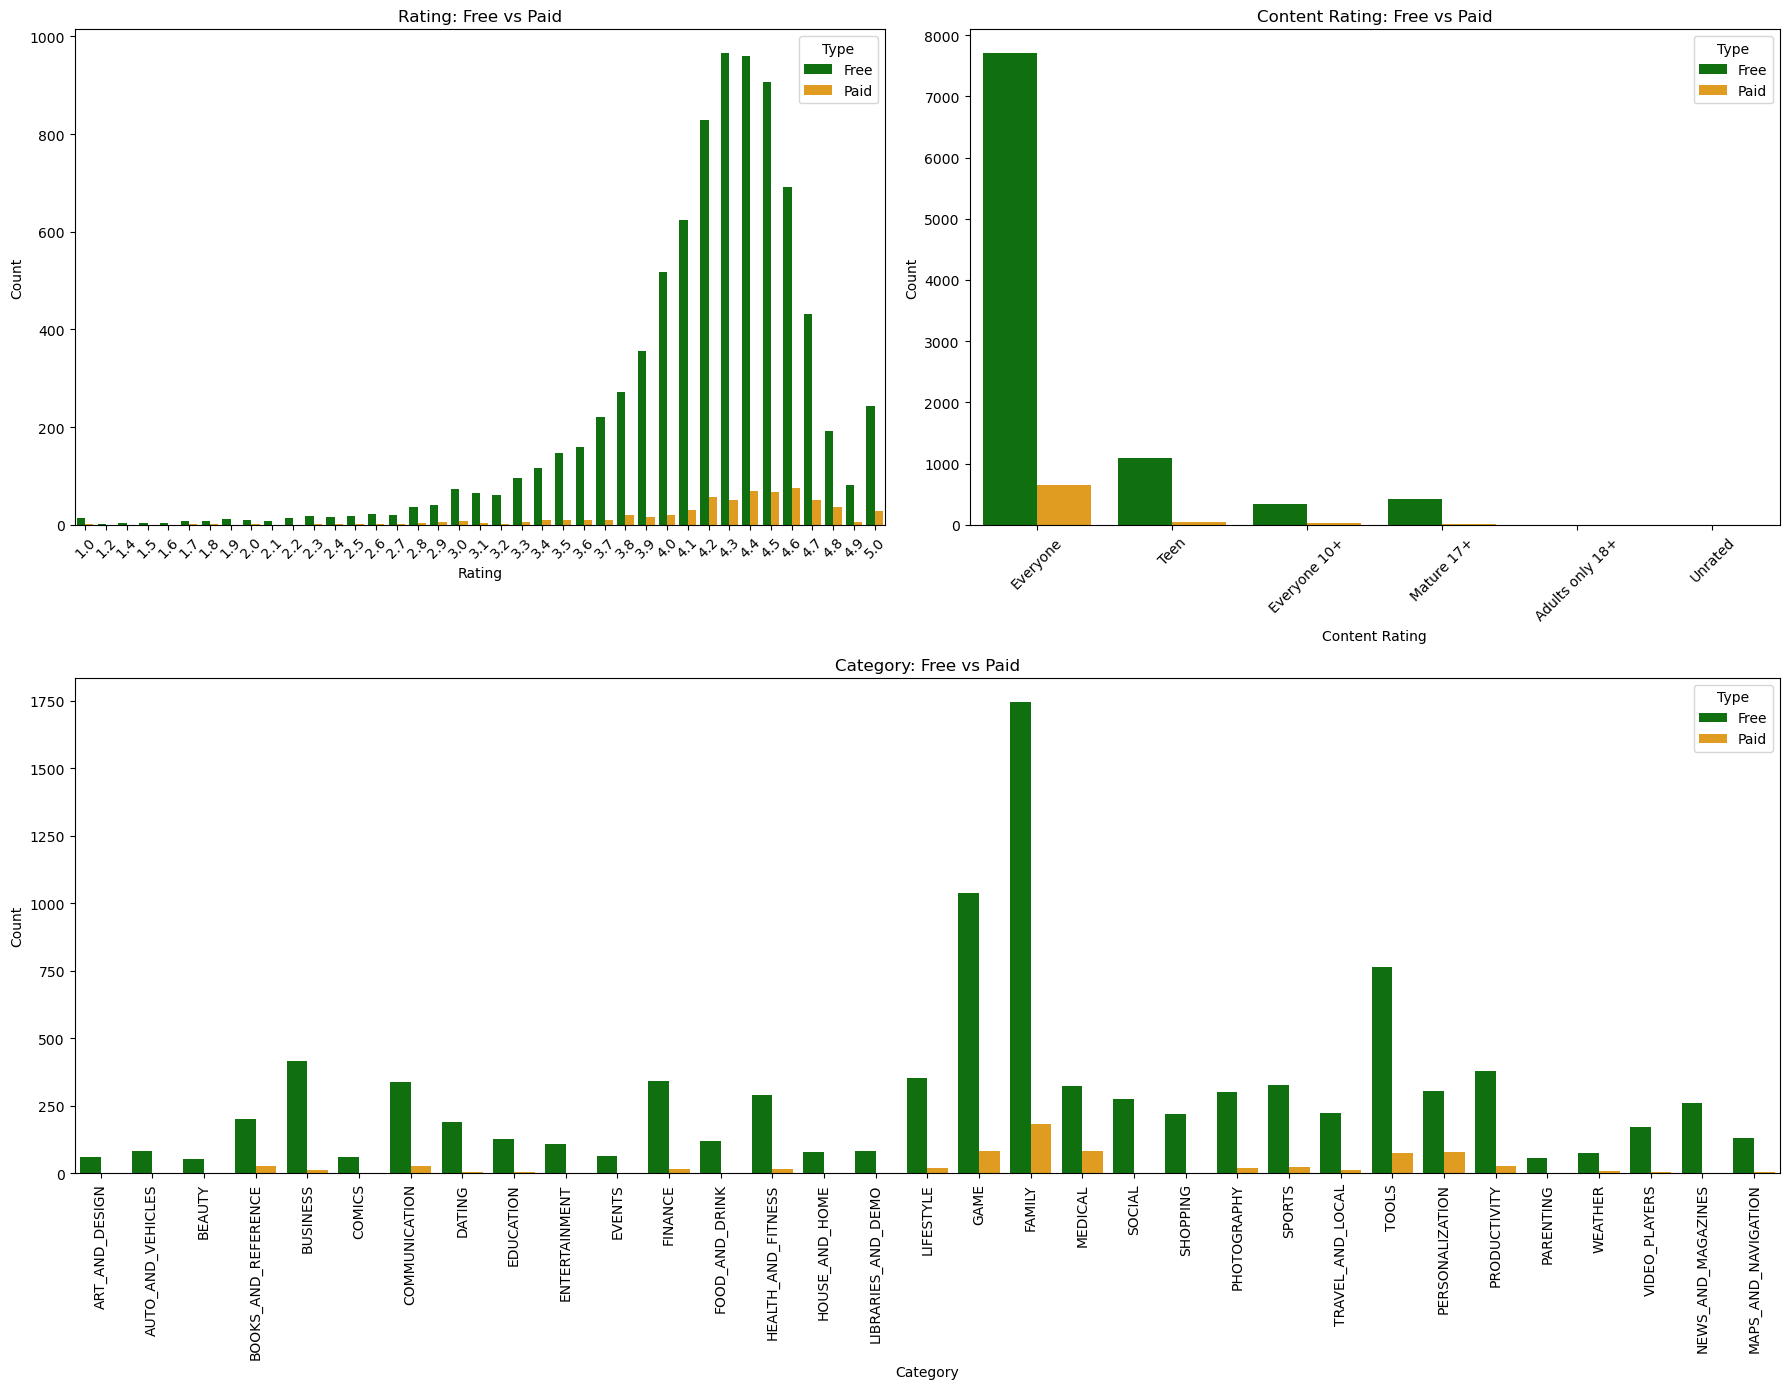

In [26]:
palette = {'Free': 'green', 'Paid': 'orange'}
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

sns.countplot(x='Rating', hue='Type', data=apps, palette=palette, ax=ax1).set(title='Rating: Free vs Paid', xlabel='Rating', ylabel='Count')
sns.countplot(x='Content Rating', hue='Type', data=apps, palette=palette, ax=ax2).set(title='Content Rating: Free vs Paid', xlabel='Content Rating', ylabel='Count')
sns.countplot(x='Category', hue='Type', data=apps, palette=palette, ax=ax3).set(title='Category: Free vs Paid', xlabel='Category', ylabel='Count')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

ניתן לראות את הקשר בין האפליקציות בחינם\בתשלום - לבין משתנים אחרים.

כגון הקטגוריות השונות, דירוג האפליקציה, סיווג האפליקציה על פי גילאים שונים. 

### נתרכז יותר בהבדל בין דירוגי וביקורות האפליקציה

In [27]:
average_rating_paid = rate_apps[rate_apps['Type'] == 'Paid']['Rating'].mean()
average_rating_free = rate_apps[rate_apps['Type'] == 'Free']['Rating'].mean()

print(f'The average rating of paid apps is: {round(average_rating_paid, 2)}')
print(f'The average rating of free apps is: {round(average_rating_free, 2)}')

The average rating of paid apps is: 4.26
The average rating of free apps is: 4.18


ההבדל אמנם קטן, אך ניתן לראות כי בממוצע דירגו באופן גבוה יותר אפליקציות בתשלום.

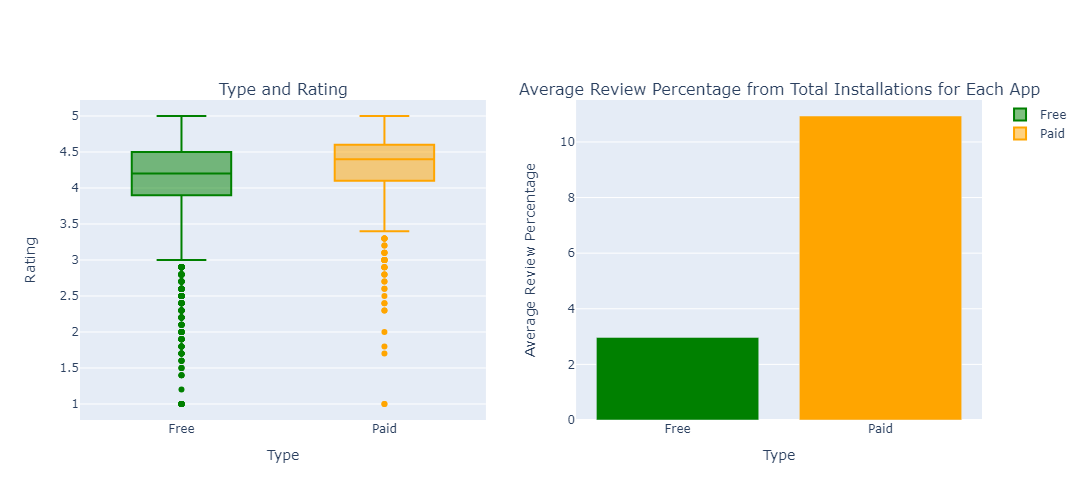

In [28]:
filtered_apps = apps[apps['Installs'].apply(lambda x: isinstance(x, (int, float))) & apps['Reviews'].apply(lambda x: isinstance(x, (int, float)))]
filtered_apps = filtered_apps[filtered_apps['Reviews'] <= 115000]
review_percentage = (filtered_apps['Reviews'] / filtered_apps['Installs']) * 100
filtered_apps = filtered_apps[review_percentage.apply(lambda x: isinstance(x, (int, float)))]

average_review_percentage = filtered_apps.groupby('Type').apply(lambda x: (x['Reviews'] / x['Installs']).mean() * 100)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Type and Rating', 'Average Review Percentage from Total Installations for Each App'))

fig.add_trace(go.Box(y=filtered_apps['Rating'][filtered_apps['Type'] == 'Free'], name='Free', marker_color='green'), row=1, col=1)
fig.add_trace(go.Box(y=filtered_apps['Rating'][filtered_apps['Type'] == 'Paid'], name='Paid', marker_color='orange'), row=1, col=1)
fig.add_trace(go.Bar(x=average_review_percentage.index, y=average_review_percentage.values, marker_color=['green', 'orange'], showlegend=False), row=1, col=2)

fig.update_layout(height=500, width=1000, showlegend=True)
fig.update_xaxes(title_text='Type', row=1, col=1)
fig.update_yaxes(title_text='Rating', row=1, col=1)
fig.update_xaxes(title_text='Type', row=1, col=2)
fig.update_yaxes(title_text='Average Review Percentage', row=1, col=2)
fig.update_layout(legend=dict(orientation="v", yanchor="top", y=1, xanchor="left", x=1.02))

fig.show()


ניתן לראות כי אחוז המשתמשים הפעילים בכתיבת ביקורות גבוה יותר עבור אפליקציות בתשלום, בהשוואה לאפליקציות חינמיות. 

נוסף על כך, הדירוג הממוצע של אפליקציות בתשלום גבוה יותר במעט מזה של אפליקציות חינמיות


Correlation between Review Percentage and Rating for Paid Apps: 0.2179297633035143


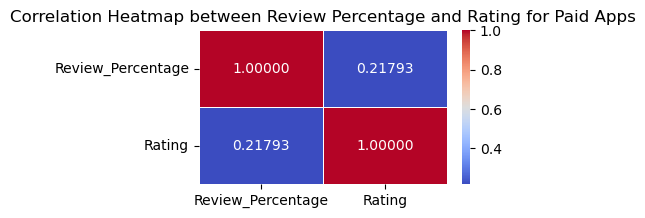

In [29]:
paid_apps['Review_Percentage'] = (paid_apps['Reviews'] / paid_apps['Installs']) * 100

paid_apps['Review_Percentage'] = pd.to_numeric(paid_apps['Review_Percentage'], errors='coerce')
paid_apps['Rating'] = pd.to_numeric(paid_apps['Rating'], errors='coerce')

paid_apps = paid_apps.dropna(subset=['Review_Percentage', 'Rating'])

correlation = paid_apps['Review_Percentage'].corr(paid_apps['Rating'])

print("Correlation between Review Percentage and Rating for Paid Apps:", correlation)

correlation_matrix = paid_apps[['Review_Percentage', 'Rating']].corr()

plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.5f')
plt.title('Correlation Heatmap between Review Percentage and Rating for Paid Apps')
plt.show()



### תובנה 1:


לסיכום, קיימת **מעורבות רבה יותר**(מבחינת ביקורות) מצד משתמשים באפליקציות בתשלום, ועם זאת, הם נוטים להעניק **דירוג גבוה יותר** לאפליקציות אלה.

בנוסף ישנה קורלציה קלה בין אחוז הביקורות לאפליקציה לבין הדירוג שלה.. 

<a id="phaze-4"></a>
## 4. Relationship between App Size and Popularity:

[back to top](#top)


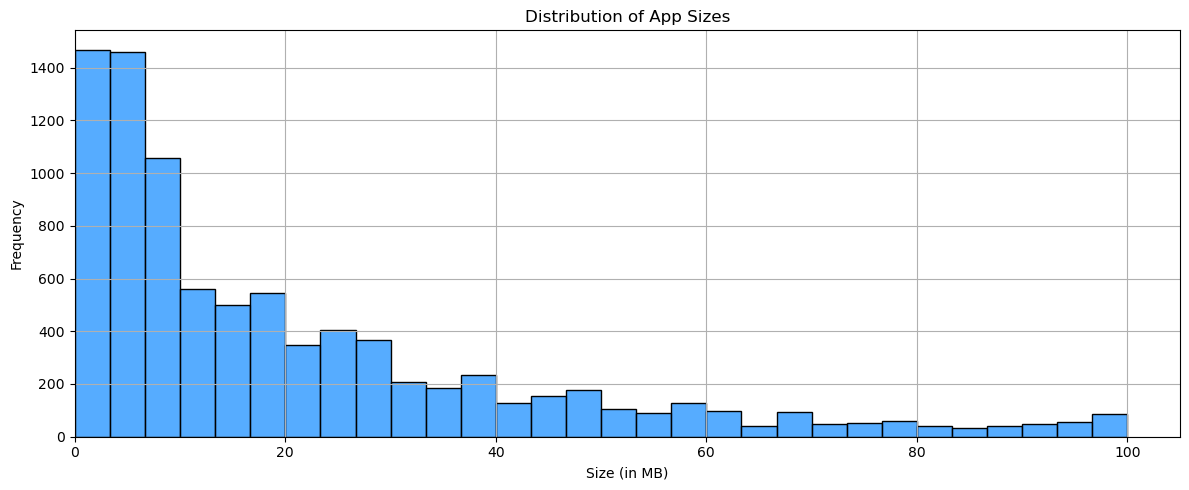

In [30]:
plt.figure(figsize=(12, 5))
sns.histplot(apps['Size_MB'], bins=30, color='dodgerblue')
plt.title('Distribution of App Sizes')
plt.xlabel('Size (in MB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

# Set the x and y axis limits
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

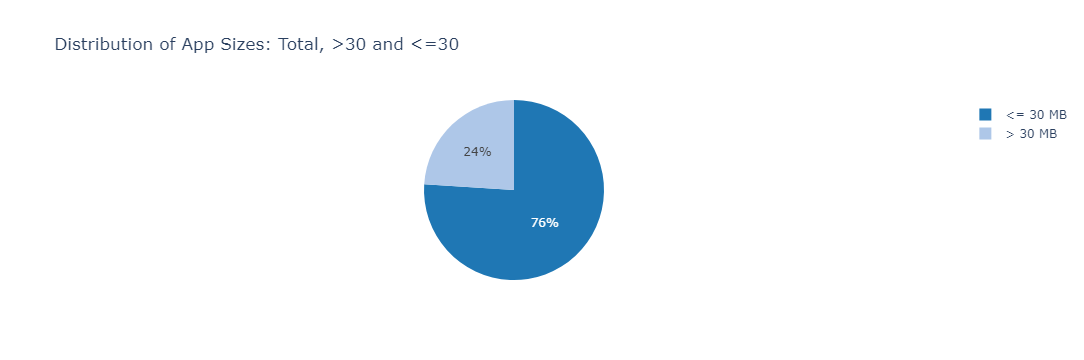

In [31]:
size_30_or_less = size_apps[size_apps['Size_MB'] <= 30]
size_more_than_30 = size_apps[size_apps['Size_MB'] > 30]

size_counts = {'Total': [len(size_30_or_less), len(size_more_than_30)]}

fig = go.Figure()
fig.add_trace(go.Pie(labels=['<= 30 MB', '> 30 MB'], values=size_counts['Total'], name='Total',marker_colors=['#1f77b4', '#aec7e8']))

fig.update_layout(title_text='Distribution of App Sizes: Total, >30 and <=30')

fig.show()


ניתן לראות כי קרוב ל-80% מהאפליקציות הן בעלות נפח אחסון קטן (<= 30 MB).

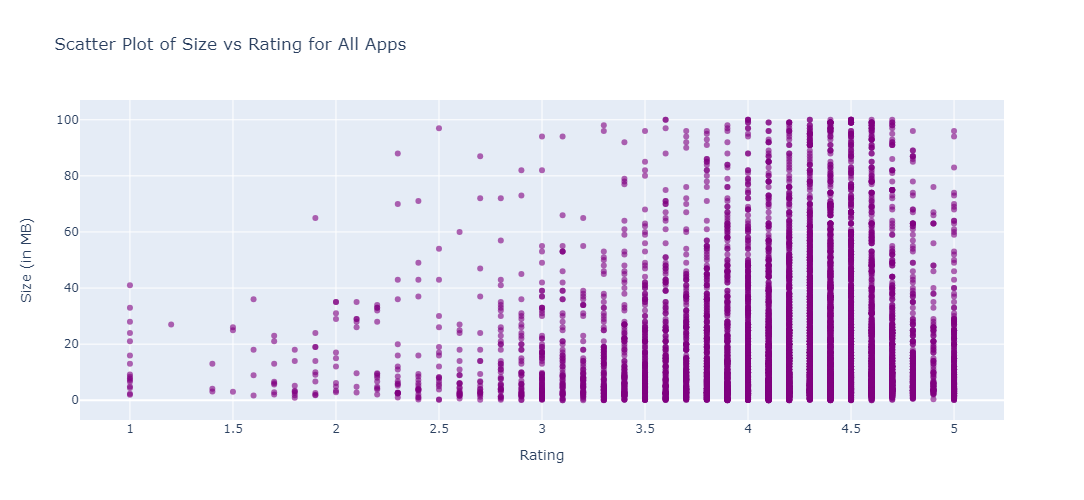

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=apps['Rating'], y=apps['Size_MB'], mode='markers',marker=dict(color='purple', opacity=0.6), name='All Apps'))
fig.update_layout(title_text='Scatter Plot of Size vs Rating for All Apps',xaxis_title='Rating', yaxis_title='Size (in MB)',width=1000, height=500, showlegend=False)

fig.show()

ניתן לראות את החלוקה בפיזור האפליקציות. אפליקציות הגדולות מ-30 מגה-בייט מדורגות בעיקר בדירוג הגבוה יותר באופן ברור יותר 

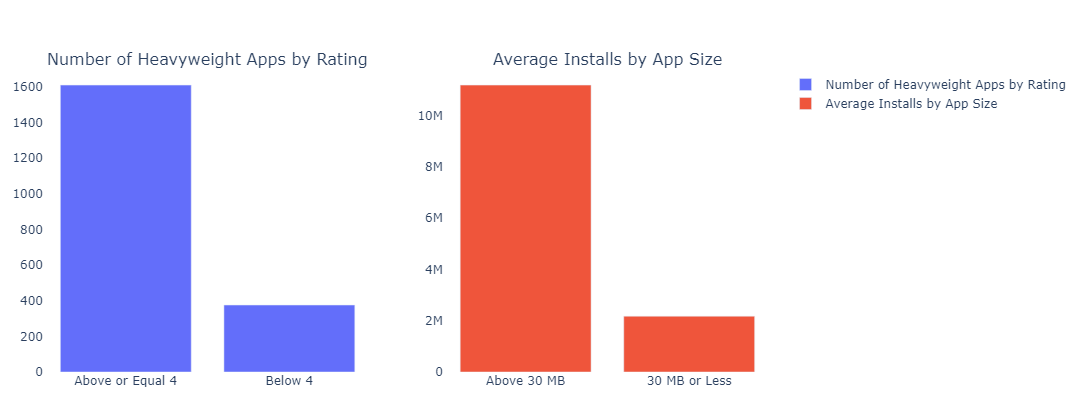

In [33]:
heavy_apps = size_apps[size_apps['Size_MB'] > 30]

total_heavy_apps = heavy_apps.shape[0]
high_rating_apps = heavy_apps[heavy_apps['Rating'] >= 4].shape[0]
low_rating_apps = heavy_apps[heavy_apps['Rating'] < 4].shape[0]

data1 = {'Rating Category': ['Above or Equal 4', 'Below 4'],'Count': [high_rating_apps, low_rating_apps]}

df1 = pd.DataFrame(data1)

large_apps = size_apps[size_apps['Size_MB'] > 30]
small_apps = size_apps[size_apps['Size_MB'] <= 30]

large_apps = large_apps[large_apps['Installs'] <= 100000000]
small_apps = small_apps[small_apps['Installs'] <= 100000000]
average_installs_large = large_apps['Installs'].mean()
average_installs_small = small_apps['Installs'].mean()

data2 = {'Size Category': ['Above 30 MB', '30 MB or Less'],'Average Installs': [average_installs_large, average_installs_small]}

df2 = pd.DataFrame(data2)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Number of Heavyweight Apps by Rating", "Average Installs by App Size"))
fig.add_trace(go.Bar(x=df1['Rating Category'], y=df1['Count'], name='Number of Heavyweight Apps by Rating'), row=1, col=1)
fig.add_trace(go.Bar(x=df2['Size Category'], y=df2['Average Installs'], name='Average Installs by App Size'), row=1, col=2)

fig.update_layout(title_text='Comparison of Heavyweight Apps and Installations', width=1000, height=400, margin=dict(t=50, b=0, l=0, r=0))
fig.update_layout(title='',margin=dict(l=20, r=20, t=70, b=20),title_x=0.5,plot_bgcolor='rgba(0,0,0,0)',paper_bgcolor='rgba(0,0,0,0)')

fig.show()

ניתן לראות כי מספר ההתקנות הממוצע לאפליקציות בעלות נפח אחסון גדול, גבוה משמעותית מאפליקציות קטנות.

בנוסף, רוב רובם של האפליקציות הגדולות מדורג עם ניקוד של 4 ומעלה.

### תובנה 2:

רוב האפליקציות - הן בעלות גודל יחסית קטן.

על אף פלח השוק הקטן של האפליקציות הגדולות יותר - נראה כי **דווקא לאפליקציות בעלות נפח אחסון גדול יותר** - **ישנה העדפת משתמש** מבחינת גובה הדירוג

נוסף על כך, **מספר ההתקנות הממוצע** לאפליקצייה שכזו, גדול באופן ניכר מאפליקציה בעלת נפח אחסון קטן.



<a id="phaze-5"></a>
## 5. The Impact of App Name on Its Popularity:

[back to top](#top)



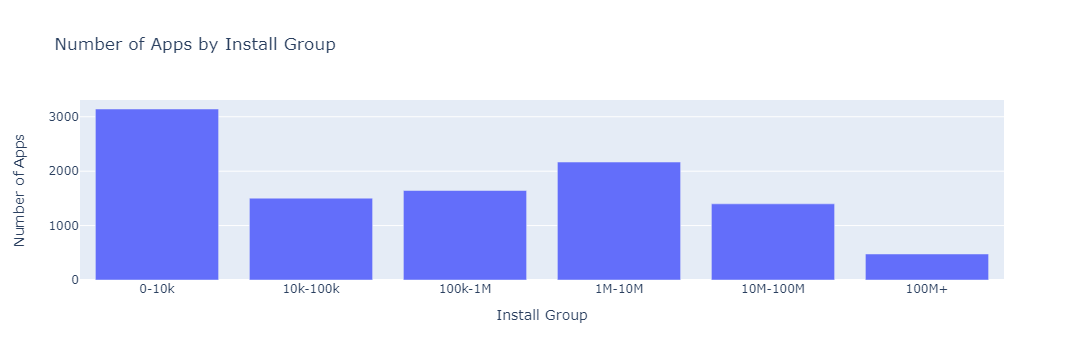

In [34]:
apps_filtered = apps.copy()

bins = [0, 10000, 100000, 1000000, 10000000, 100000000, float('inf')]
labels = ['0-10k', '10k-100k', '100k-1M', '1M-10M', '10M-100M', '100M+']
install_groups = pd.cut(apps_filtered['Installs'], bins=bins, labels=labels, right=False)
install_groups_counts = install_groups.value_counts().sort_index()
install_groups_df = pd.DataFrame({'Installs_Group': install_groups_counts.index, 'Count': install_groups_counts.values})

fig = px.bar(install_groups_df, x='Installs_Group', y='Count', title='Number of Apps by Install Group', labels={'Installs_Group': 'Install Group', 'Count': 'Number of Apps'})

fig.show()

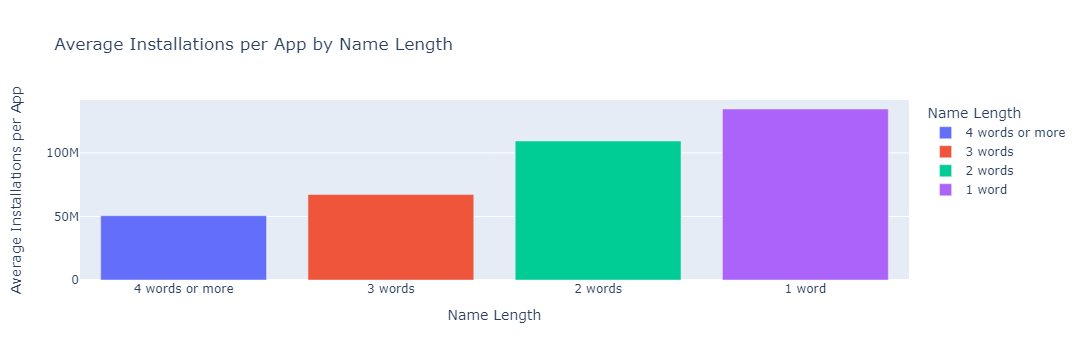

In [35]:
apps_filtered = apps.copy()

apps_10M_plus = apps_filtered[apps_filtered['Installs'] >= 10000000].copy()
apps_10M_plus['Name_word_count'] = apps_10M_plus['App'].apply(lambda x: len(x.split()))
apps_10M_plus['Name_check'] = apps_10M_plus['Name_word_count'].apply(lambda x: '1 word' if x == 1 else '2 words' if x == 2 else '3 words' if x == 3 else '4 words or more')

average_installs_by_name_length_4 = apps_10M_plus.groupby('Name_check')['Installs'].mean().reset_index()
average_installs_by_name_length_4 = average_installs_by_name_length_4.sort_values(by='Installs')

fig = px.bar(average_installs_by_name_length_4,x='Name_check',y='Installs',title='Average Installations per App by Name Length',labels={'Name_check': 'Name Length', 'Installs': 'Average Installations per App'},color='Name_check')

fig.show()

### תובנה 3:

בין האפליקציות הפופולריות ביותר, דווקא אלה עם **השם הקצר והקולע** יותר - הם אלה עם **מספר ההתקנות בממוצע הגבוה יותר**


<a id="phase-6"></a>
## 6.Conclusion and Key Insights:

[back to top](#top)

##1. נמליץ לבדוק את הכדאיות להשקיע יותר ב**אפליקציות בתשלום**, שכן אפליקציות אלה זוכות למעורבות גבוהה יותר ודירוגים גבוהים יותר.

##2. ייתכן כי כדאי להגדיל את ההיצע של ה**אפליקציות בעלות נפח אחסון גדול** ולהשקיע בהם, מכיוון שמשתמשים נוטים להעדיף אותן הן מבחינת דירוג והן מבחינת מספר ההתקנות.

##3. נבחן את האפשרות לבחור **שמות קצרים וקולעים** שכן מספר ההתקנות הממוצע לאפליקציות שכאלה גדול יותר מאפליקציות עם שמות ארוכים יותר.